In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
# from sklearn.datasets import fetch_openml
# housing = fetch_openml(name="house_prices", as_frame=True)
# df=housing['data']

In [4]:
data = pd.read_csv("House Prices Prediction/train.csv")

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
missing = data.isnull().sum()
missing = missing[missing > 0 ]
missing.sort_values(inplace=True)
missing

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

<AxesSubplot:>

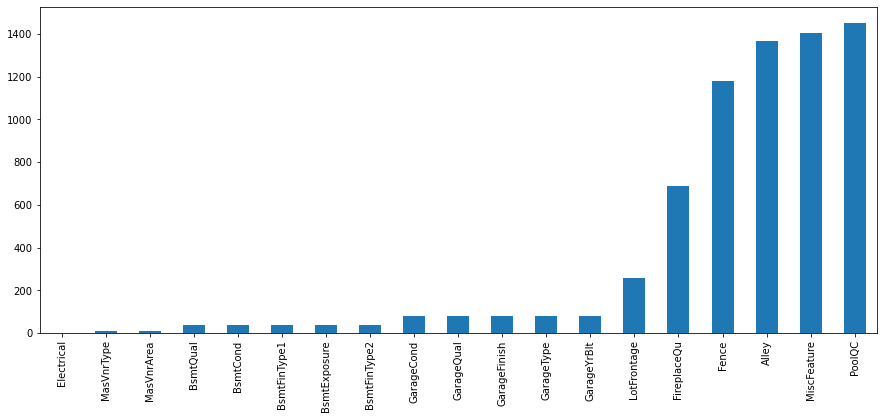

In [8]:
plt.figure(figsize=(15,6))
# sns.barplot(x = missing.index, y = missing.values)
missing.plot.bar()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

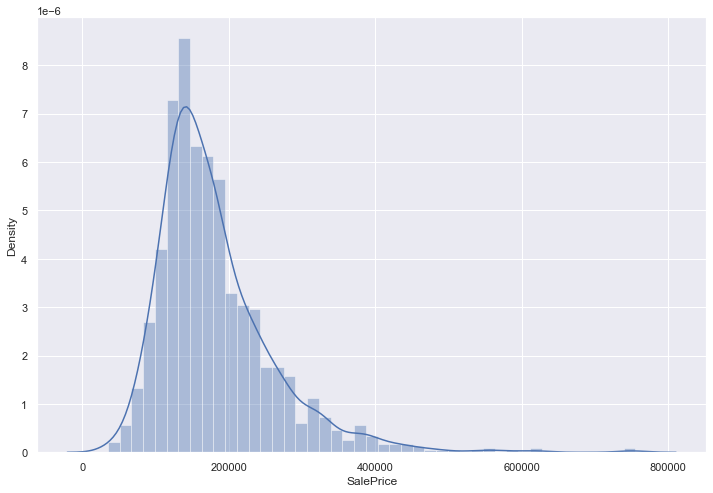

In [9]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(data['SalePrice'],kde=True,hist=True, bins=45)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

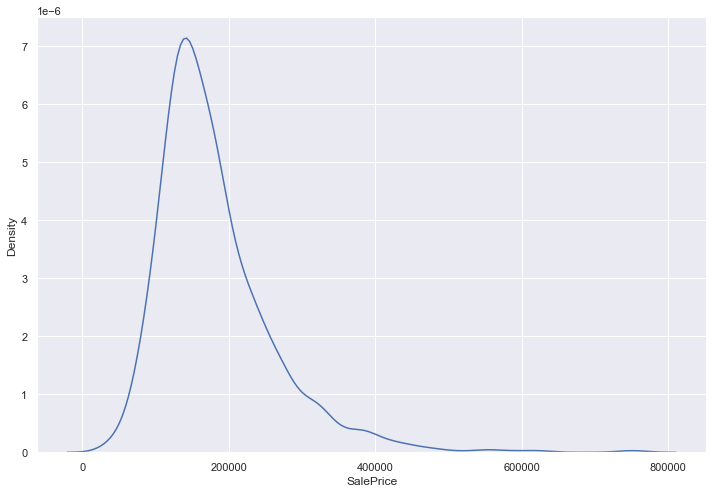

In [10]:
sns.distplot(data['SalePrice'],kde=True,hist=False, bins=45)

In [11]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Observation :
        Mean is greater than Median.
        75% data lies between 34k to 214k
        last 25% OF data lies between 214k to 755k. It means data is highly skewed towords Right side
        Target Feature is Right Skewed data

## Correlation

In [12]:
# selecting int and float columns - numerical features

numerical_features = data.select_dtypes(include=[np.number])
numerical_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
# selecting int and float columns

categorical_features = data.select_dtypes(include=[np.object])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
correlation = data[numerical_features.columns].corr()
correlation['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<AxesSubplot:title={'center':'Correlation of numerical features with sales price'}>

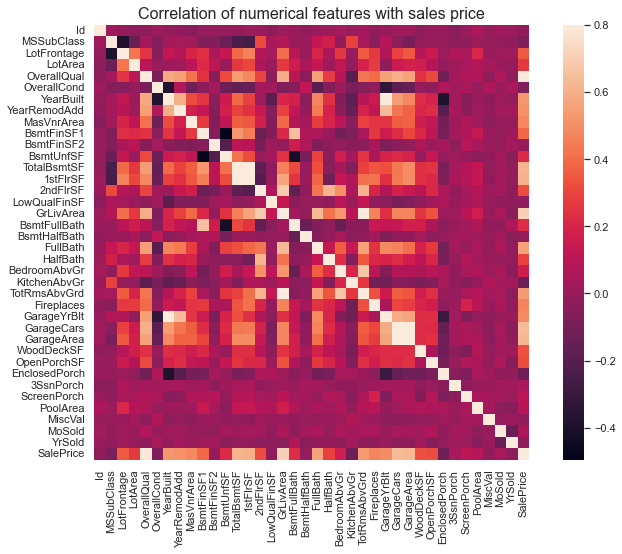

In [15]:
plt.title("Correlation of numerical features with sales price",y=1,size = 16)
sns.heatmap(correlation,square=True,vmax=0.8)

### Full White color are Highly correlated with Positive:
    SalePrice vs OverallQual
    GrarageYrBit vs YearBuilt
    1stFlrSf vs TotalBsmtSF
    etc..
    
### Full black color are Highly correlated with Negative:
    MSSubclass vs LotForntage
    YearBuilt vs OverallCond
    BumtUnfSF vs BsmtFinSF1
    BsmtFullBath vs BumtUnfSF
    etc..

### Top 11 Features which are highly correlated with SalePrice

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


<AxesSubplot:>

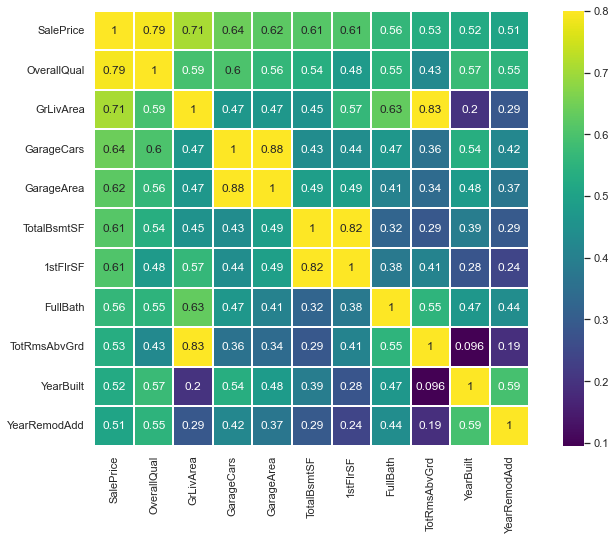

In [16]:
k = 11
cols = correlation.nlargest(n = k,columns='SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
# f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(cm, vmax=0.8, linewidths=0.01,square=True, annot=True,cmap='viridis',
           linecolor='white',annot_kws={'size':12},xticklabels=cols.values,yticklabels=cols.values)

### Observation:
        We can consider Two columns are multicollinear if correlation coeff is >0.80
        GarageArea highly correlated with GarageCars = 0.88, We can drop one of the column --> To avoid Multicollinearity
        
        Comparing with SalePrice column 
        
                        SalePrice
        GarageCars       0.640409
        GarageArea       0.623431
        
        Will can drop GarageArea column.
        Similarly we can drop one of the column between:
            1. TotalBsmtSF vs 1stFlrSF   --> +ve Corr
            2. TotRmsAbvGrd vs GrLivArea --> +ve Corr
            3. TotRmsAbvGrd vs YearBuilt --> -ve Corr
        

## Scatter Plot

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

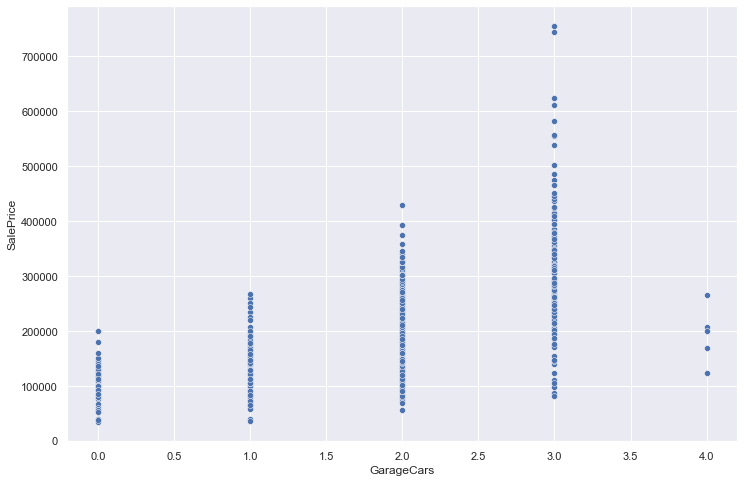

In [17]:
sns.scatterplot(x=data['GarageCars'],y=data['SalePrice'])

### Observation:
        When GarageCars increasing SalePrice is also increasing

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

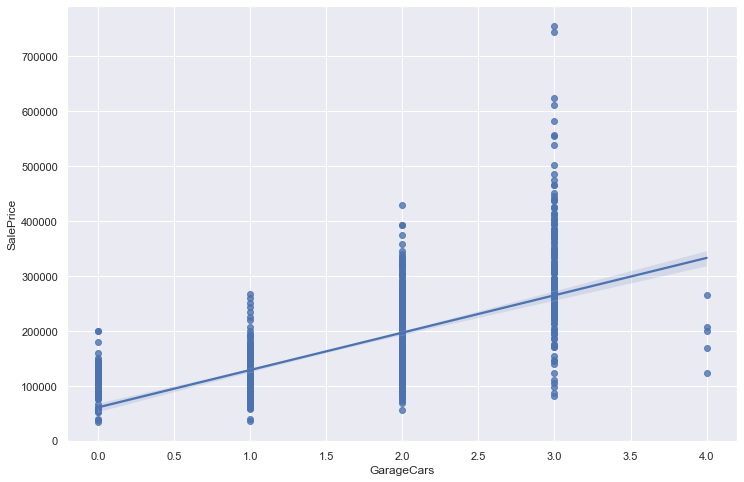

In [18]:
sns.regplot(x=data['GarageCars'],y=data['SalePrice'], scatter=True, fit_reg=True)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

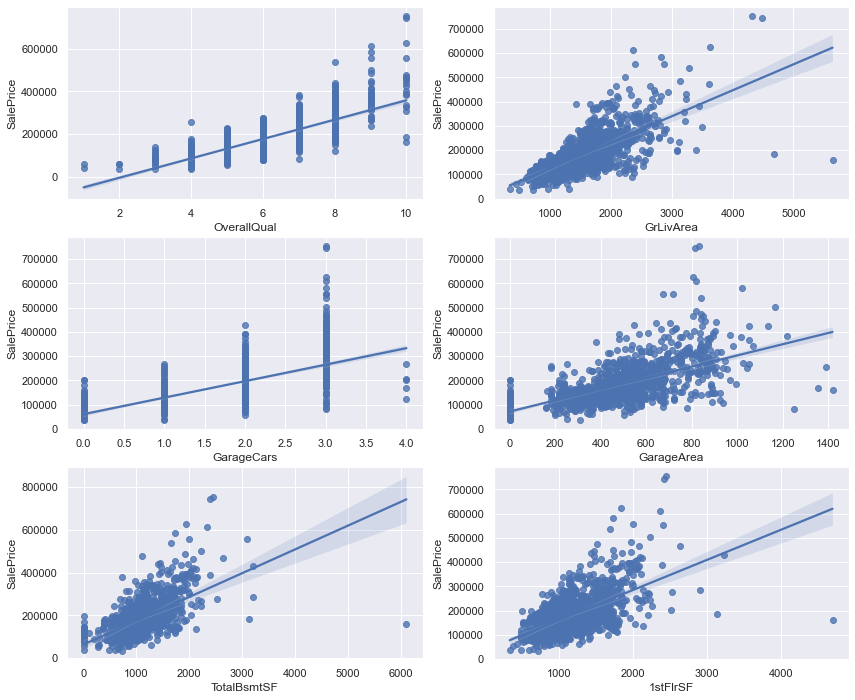

In [19]:
## scatter plots between the most correlated variables

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,12))

sns.regplot(x='OverallQual', y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax1)
sns.regplot(x='GrLivArea', y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax2)
sns.regplot(x='GarageCars', y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax3)
sns.regplot(x='GarageArea', y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax4)
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax5)
sns.regplot(x='1stFlrSF', y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax6)

### Observation:
        In all this cases there is increase in trend
        In SalePrice vs GrLivArea, there is an outlier, with GrLivArea = 5700(apx..) but slaeprice is normal.
        This outlier may effect the Prediction.

# Boxplots

<AxesSubplot:xlabel='SalePrice'>

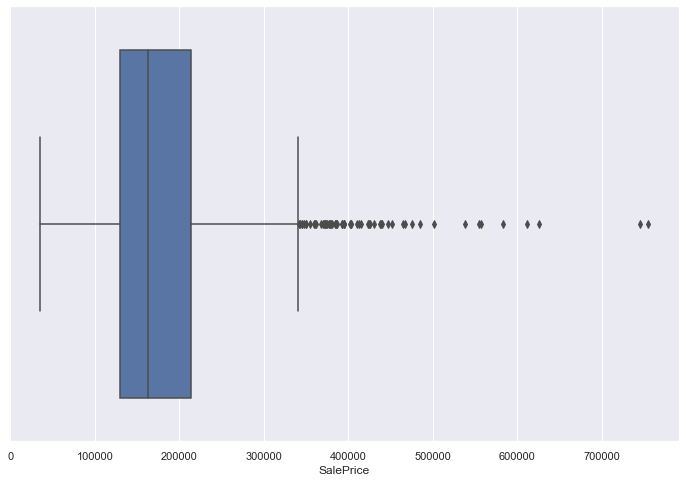

In [23]:
sns.boxplot(x=data['SalePrice'])

### Observations:
    There are properties which are extreamly High. not following regular pattern

(-0.5, 9.5, 0.0, 800000.0)

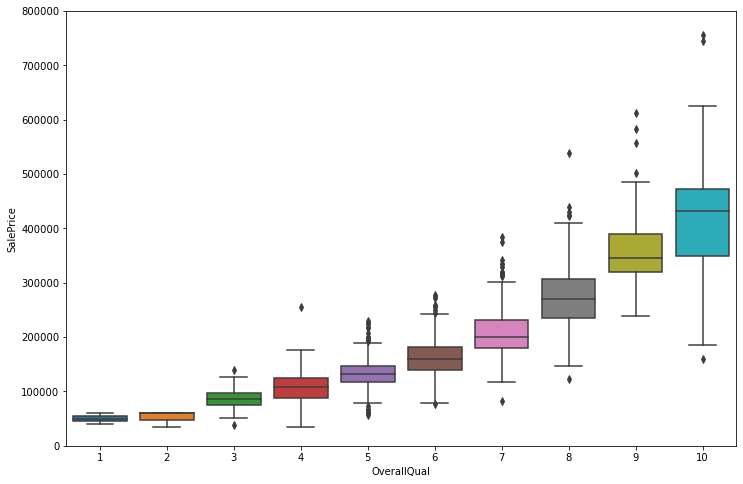

In [6]:
f, ax = plt.subplots(figsize=(12,8))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin=0,ymax=800000)

In [28]:
data['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [35]:
data.shape

(1460, 81)

In [ ]:
### Multicollinear features:
1.  GarageArea <-> GarageCars
2.  TotalBsmtSF <-> 1stFlrSF
3.  TotRmsAbvGrd <-> GrLivArea
4.  TotRmsAbvGrd <-> YearBuilt
Features with missing values more than 20%
5.  FireplaceQu      690/1460 = 47%
6.  Fence           1179/1460 = 80%
7.  Alley           1369/1460 = 93%
8.  MiscFeature     1406/1460 = 96%
9.  PoolQC          1453/1460 = 99%
Feature with poor correlation with Target Feature(SalePrice)
10  WoodDeckSF
11  2ndFlrSF
12  OpenPorchSF
13  HalfBath
14  LotArea
15  BsmtFullBath
16  BsmtUnfSF
17  BedroomAbvGr
18  ScreenPorch
19  PoolArea
20  MoSold
21  3SsnPorch
22  BsmtFinSF2
23  BsmtHalfBath
24  MiscVal
25  Id
26  LowQualFinSF
27  YrSold
28  OverallCond
29  MSSubClass
30  EnclosedPorch
31  KitchenAbvGr

In [36]:
col_remove = ['GarageArea','TotalBsmtSF','TotRmsAbvGrd','TotRmsAbvGrd','FireplaceQu','Fence','Alley','MiscFeature','PoolQC',
              'WoodDeckSF','2ndFlrSF','OpenPorchSF','HalfBath','LotArea','BsmtFullBath','BsmtUnfSF','BedroomAbvGr',
              'ScreenPorch','PoolArea','MoSold','3SsnPorch','BsmtFinSF2','BsmtHalfBath','MiscVal','Id','LowQualFinSF',
              'YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr']

In [37]:
data.drop(col_remove,axis=1, inplace=True)

In [38]:
data.shape

(1460, 51)